In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
import ppscore as pps
import statsmodels.api as sm

warnings.simplefilter("ignore")
%matplotlib inline

In [2]:
train = pd.read_csv("../data/train.csv", index_col = [0])
test = pd.read_csv("../data/test.csv", index_col = [0])

In [3]:
temporal = [var for var in train.columns if ("Yr" in var) 
        or ("Mo" in var) or ("Year" in var)]

levels = ["OverallCond", "OverallQual", "BsmtFullBath", 
          "BsmtHalfBath", "FullBath", "HalfBath", 
          "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", 
          "Fireplaces", "GarageCars", "ExterQual", 
          "ExterCond", "BsmtQual", "BsmtCond", 
          "BsmtExposure", "HeatingQC", "KitchenQual", 
          "GarageQual","GarageCond", "ExterQual",
          "ExterCond", "BsmtQual", "BsmtCond", 
          "BsmtExposure","HeatingQC", "PoolQC", 
          "KitchenQual", "GarageQual","GarageCond", "FireplaceQu"]

categorical = [var for var in train.columns if (train[var].dtype =='O') 
               and (var not in temporal)
              and (var not in levels)] + ["MSSubClass"]

numerical = [var for var in train.columns if (train[var].dtype !='O') 
             and (var not in temporal) 
             and (var not in levels) and (var != "SalePrice")]
numerical_level = levels + numerical

### Sale Price 

Skewness: 1.882876
Kurtosis: 6.536282


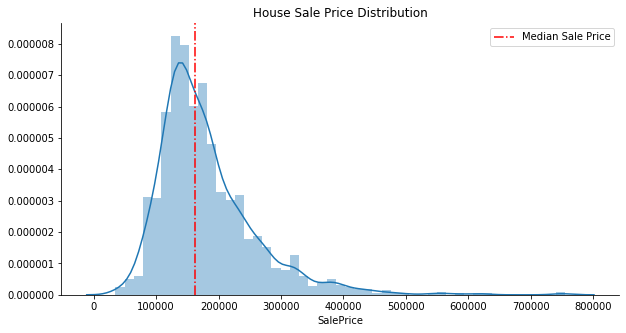

In [4]:
plt.figure(figsize = (10,5))
sns.distplot(train["SalePrice"])

print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

sns.despine()
plt.title("House Sale Price Distribution")
plt.axvline(train["SalePrice"].median(), linestyle = "-.", color = "r", label = "Median Sale Price")
plt.legend()
plt.savefig("../pics/SalePrice")

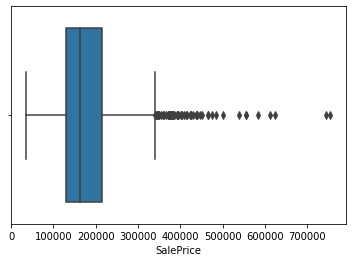

In [5]:
sns.boxplot(train["SalePrice"])

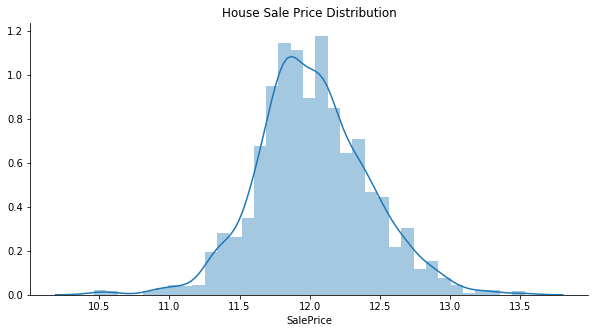

In [6]:
plt.figure(figsize = (10,5))
sns.distplot(np.log(train["SalePrice"]))
sns.despine()
plt.title("House Sale Price Distribution")
plt.savefig("../pics/log_SalePrice")

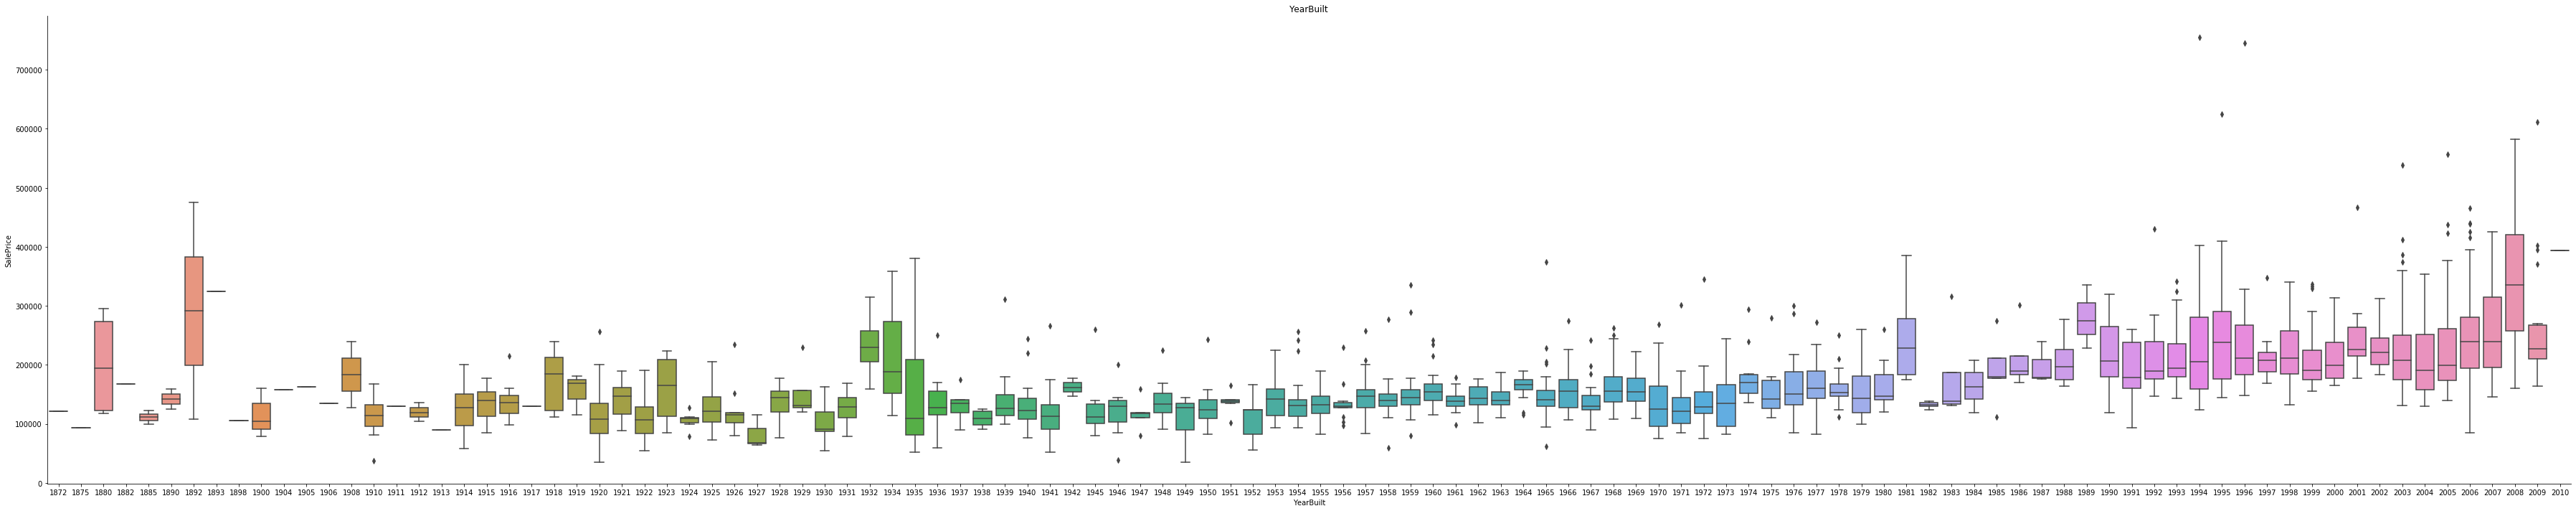

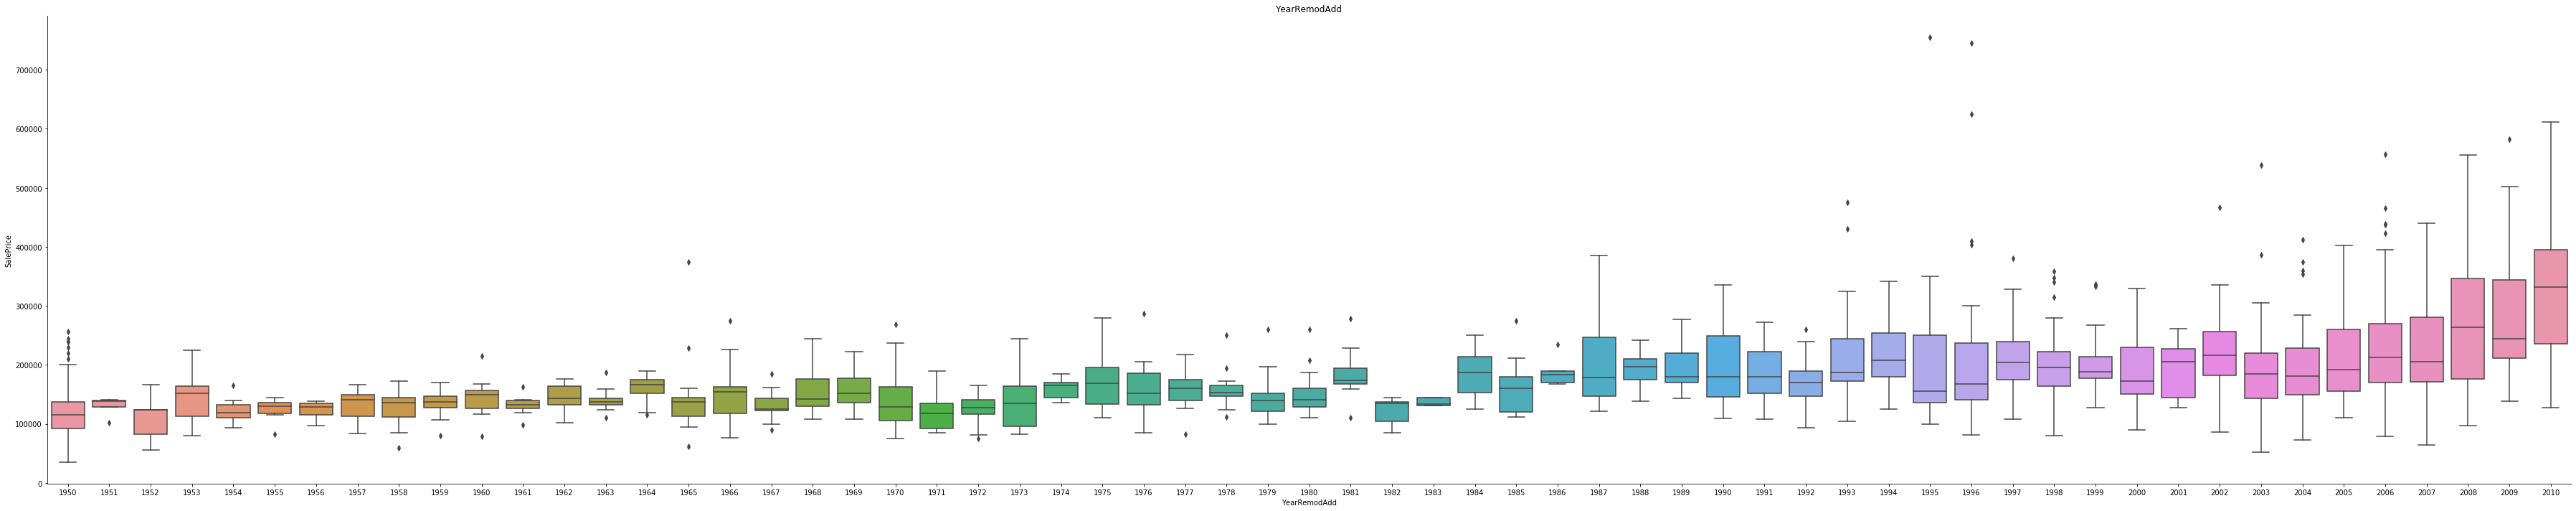

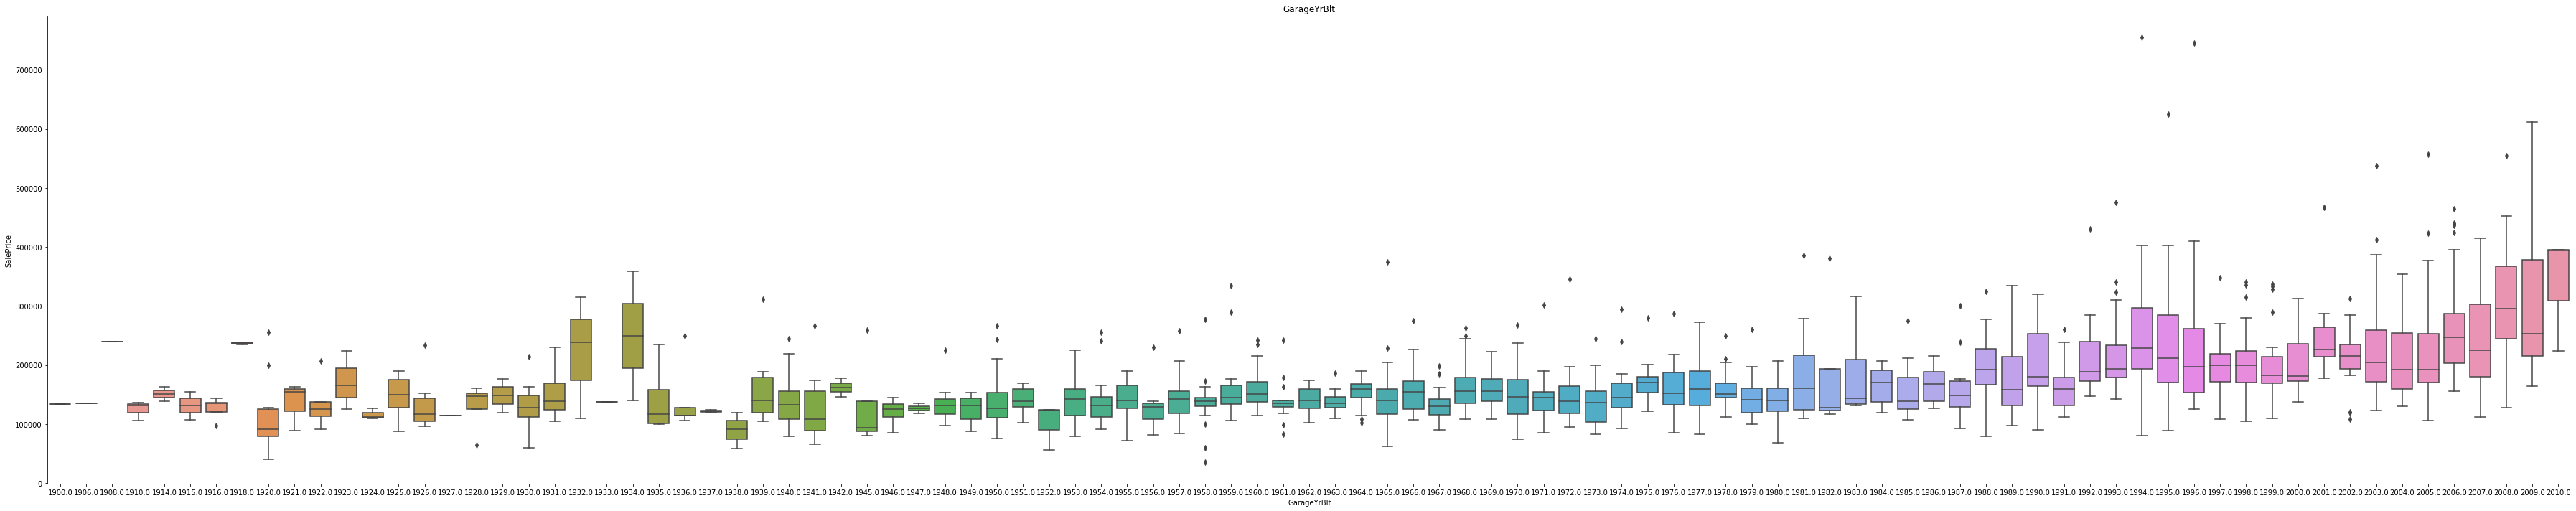

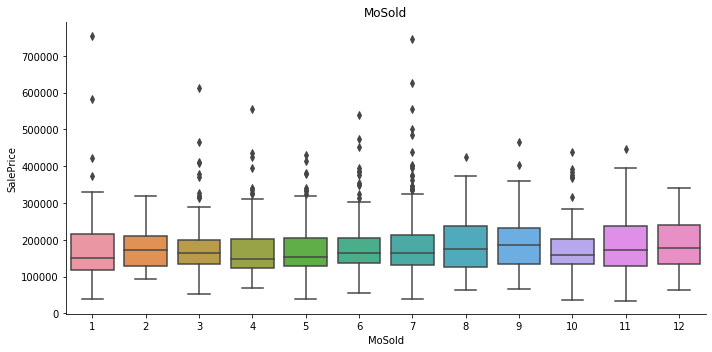

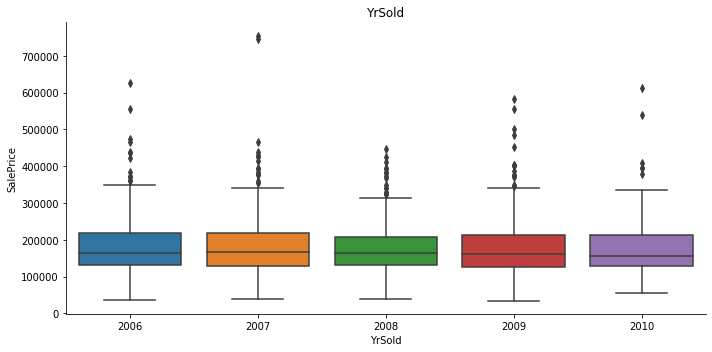

In [7]:
temporal_train = train[temporal]

for i in temporal_train.columns:
    if i == "SalePrice":
        continue
    if len(temporal_train[i].unique()) > 20:
        plt.figure(figsize = (50,10))
    else:
        plt.figure(figsize = (10,5))
    sns.boxplot(x = temporal_train[i], y = train["SalePrice"])
    sns.despine()
    plt.title(i)
    plt.tight_layout()
    plt.savefig("../pics/%s"%i)

In [8]:
temporal_train["n_temp_houseAge"] = temporal_train["YrSold"] - temporal_train["YearBuilt"]
temporal_train["n_temp_lastRemodelled"] = temporal_train["YrSold"] - temporal_train["YearRemodAdd"]
temporal_train["n_temp_garageAge"] = temporal_train["YrSold"] - temporal_train["GarageYrBlt"]

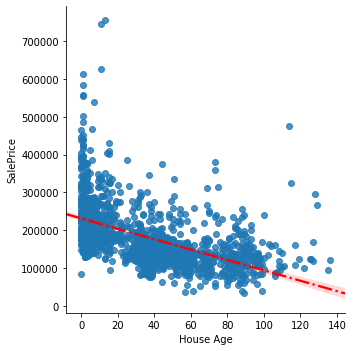

In [9]:
data = pd.concat([temporal_train, train[["SalePrice"]]], axis = 1)
sns.lmplot(x = "n_temp_houseAge", 
           y = "SalePrice", 
           data = data,
          line_kws={'color': 'red', 'linestyle':'-.'})
plt.xlabel("House Age")
plt.savefig("../pics/houseAge")

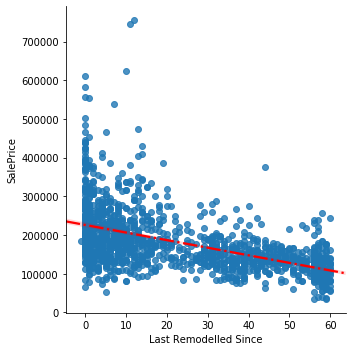

In [10]:
data = pd.concat([temporal_train, train[["SalePrice"]]], axis = 1)
sns.lmplot(x = "n_temp_lastRemodelled", 
           y = "SalePrice", 
           data = data, line_kws={'color': 'red', 'linestyle':'-.'})
plt.xlabel("Last Remodelled Since")
plt.savefig("../pics/lastRemodelled")

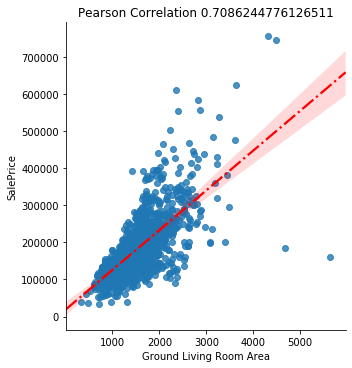

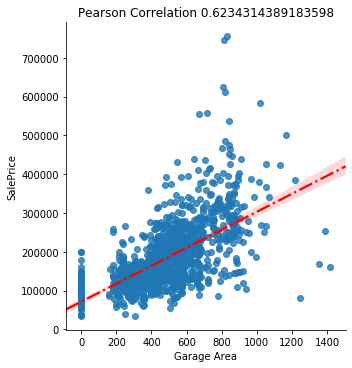

In [27]:
sns.lmplot(x = "GrLivArea", 
           y = "SalePrice", 
           data = train,
          line_kws={'color': 'red', 'linestyle':'-.'})
plt.xlabel("Ground Living Room Area")
plt.title("Pearson Correlation {}".format(train[["GrLivArea", "SalePrice"]].corr().iloc[0][1]))
plt.savefig("../pics/GrLivArea", bbox_inches='tight')

sns.lmplot(x = "GarageArea", 
           y = "SalePrice", 
           data = train,
          line_kws={'color': 'red', 'linestyle':'-.'})
plt.xlabel("Garage Area")
plt.title("Pearson Correlation {}".format(train[["GarageArea", "SalePrice"]].corr().iloc[0][1]))
plt.savefig("../pics/garageArea", bbox_inches='tight')


In [23]:
train[["GrLivArea", "SalePrice"]].corr().iloc[0][1]

0.7086244776126511

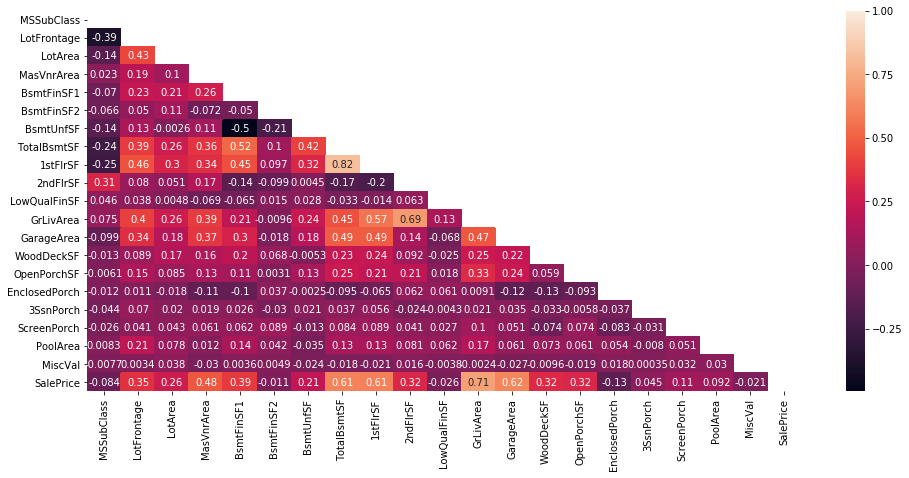

In [20]:
plt.figure(figsize = (16,7))
sns.heatmap(train[numerical + ["SalePrice"]].corr(), 
            mask = np.triu(np.ones_like(train[numerical + ["SalePrice"]].corr(), 
                                        dtype=np.bool)),
            annot = True)
plt.savefig("../pics/continuous_corr")